# Desarrollo Tarea 3

#### **Estudiante:** Omar David Toledo Leguizamón

## Parte 1. El problema de las vueltas

#### **1. Formalización del problema**

Para formalizar este problema, debemos entender que nuestro objetivo es determinar la cantidad mínima de monedas, de un conjunto de denomincación, necesarias para alcanzar un valor deseado. Dado esto, podemos definir:

<center>

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
|  E  |  $P$   | **nat** | Valor que se desea alcanzar con una combinación de monedas de denominación específica |
|  E  |  $a$   | Array[0,n) of **nat** | Arreglo que contiene la denominación de las $n$ diferentes monedas a usar |
|  S  |  $m$   | **nat** | Entero que representa la cantidad mínima de monedas de denominaciones $a$ necesarias para alcanzar el valor $P$  |


</center>



* **Precondición**: Debe existir una moneda de $1$ y las denominaciones estan organizadas de manera ascendente.

$$ a[0] =  1 \wedge ( \forall_i \, | \, 0 \leq i < n-1 : a[i] < a[i+1] )$$

* **Postcondición**: Definimos una función $C$ que dado un arreglo que representa la cantidad de monedas de cada denominación, se obtiene el total de monedas utilizadas; y un conjunto $S$ que representa todas las soluciones del problema que con un conjunto de monedas de denominación $a$ se obtenga de suma total $P$:

$$C(m) = \sum_{i=0} ^ {m.\text{len}-1} m[i]$$

$$S_{a,P} = \left\{ x: \text{Array of nat } \, | \, x.\text{len } = a.\text{len } \wedge x[i]\geq 0 \wedge  \sum_{i=0} ^ {a.\text{len}-1} x[i] \cdot a[i] = P\right\} $$

 Dado esto, planteamos la postcondición del problema:

$$ m \in S_{a,P} \wedge (\forall_{x} \, | \, x \in S_{a,P} : C(x) \geq C(m))$$


#### **2. Función que representa el problema**



Dado el problema descrito, la entrada $P$ y el arreglo $a = \{ 1, d_2,...,d_n \}$, definimos la función

$$C: \mathbb{N} \times \mathbb{N} \mapsto \mathbb{N} \cup \{\infty\} $$

que recibe como entradas el valor deseado a alcanzar $i$ y las $j$-esimas primeras denominaciones del arreglo $a$; y retornando como resultado la cantidad mínima de monedas necesarias para obtener el valor deseado dadas las condiciones descritas por las entradas.

La propuesta para dicha función $C(i,j)$ es la siguiente:

$$C(i,j) = \left\{ \begin{array}{lcccr}
           0 & & \text{si} & & i=0 \\
           \infty & & \text{si} & & j=0 \wedge i>0\\
           C(i,j-1) & & \text{si} & & j>0 \wedge i>0 \wedge a[j-1] > i \\
           \min(C(i-a[j-1],j)+1 , C(i,j-1)) & & \text{si} & & j>0 \wedge i>0 \wedge a[j-1] \leq i \\
            
        \end{array} \right.$$

Podemos justificar el porque de esta función recursiva:

1. Para el caso en el que el valor deseado sea $0$ (Descrito como $i=0$) no debemos elegir monedas de alguna denominación ya que por trivialidad ya tenemos el objetivo deseado. Dado esto, definimos que en este caso la cantidad de monedas es 0.
2. Cuando ya no hay monedas para elegir y aún debemos cubrir un valor mayor a cero, significa que este subproblema no tiene solución, dado el problema de minimización, en esta situación se devuelve $\infty$ (Esto es usado como un recurso. Es importante resaltar que si la entrada cumple las precondiciones dadas, no se obtendrá este caso extremo como la solución del problema)
3. Cuando el valor de la última denominación ubicada en en el conjunto cubierto $d_{j}$ es mayor al valor deseado (Descrito como $a[j-1] > i$) significa que no existe una solución para este subproblema que involucre que la denominación $d_{j}$. Por consiguiente, la solución de este subproblema es equivalente a la solución del mismo subproblema pero sin incluir la última denominación, lo que se describe como $C(i,j-1)$
4. Cuando ninguno de los casos anteriores se aplicaron, significa que tenemos dos posibles situaciones; y dado que es un problema de minimización, elegimos el resultado mas pequeño de las dos. Las situaciones a considerar son:

    4.1 No se incluye una moneda de denominación $d_{j}$ y deja de considerar como opción: $C(i-a[j-1],j)+1 $

    4.2 Se incluye una moneda de denominación $d_{j}$ y se sigue considerando como posible opción para incluir: $C(i-a[j-1],j)+1 $
    

Dado el enfoque en casos bases e identificar el subproblema que deriva a una solución con una menor cantidad de monedas, se puede concluir que esta función permite obtener la solución óptima del problema, el cual se puede escribir como:

$$m = C(P,n)$$

Adicionalmente, podemos garantizar que el problema siempre tendrá solución dadas las precondiciones, esto dado que siempre se tiene la moneda de denominación $1$, que garantiza que para cualquier problema de alcanzar el valor $P$, se puede conseguir con $P$ monedas como máximo.


#### **3. Implementación recursiva**

La implementación recursiva de este problema se puede encontrar en la clase RecursiveCoinChangeAlgorithm. Sin embargo, a continuación se presenta en formato de código de Java.

```java
public int [] calculateOptimalChange(int totalValue, int [] denominations){
        int [] answer = new int[denominations.length];
        return C(totalValue, denominations.length, denominations, answer);
    }

public int getValue(int[] solution){
        if(solution==null) return Integer.MAX_VALUE;
        int sum = 0;
        for(int i=0; i<solution.length;i++){
            sum += solution[i];
        }
        return sum;

    }

public int[] C(int i, int j, int[] a ,int[] partial_answer){
        if (i==0) return partial_answer;
        if (i>0 && j==0) return null;
        if (j>0 && i>0 && a[j-1] > i) return C(i,j-1,a,partial_answer);
        
        int [] partial_answer_copy =  Arrays.copyOf(partial_answer, partial_answer.length);
        
        partial_answer_copy[j-1] += 1;

        int[] case1 = C(i-a[j-1],j,a,partial_answer_copy);
        int[] case2 = C(i,j-1,a,partial_answer);

        if (getValue(case1) > getValue(case2)) return case2;
        else return case1;

    }
```

Es importante resaltar que esta función tiene unas modificacines en comparación con la recurrencia para poder ir guardando la respuesta en cada subproblema. Sin embargo, el principio de funcionamiento es esencialmente el mismo.

#### **4. Implementación del algortimo Greedy**

Este algoritmo parte del principio de elegir siempre la moneda de mayor valor posible. La implementación en Java se encuentra en la clase *GreedyCoinChangeAlgorithm* pero su cuerpo se presenta a continuación.

```java
public int [] calculateOptimalChange(int totalValue, int [] denominations){
        int n = denominations.length;
        int [] answer = new int[n];
        while(n>0){
            answer[n-1] = totalValue / denominations[n-1];
            totalValue =  totalValue % denominations[n-1];
            n--;
        }
        return answer;
    }
```

Podemos denotar que este algoritmo solo requiere iterar desde la moneda de mayor denominación hasta llegar a aquella de menor aplicando operaciones constantes en cada vuelta del ciclo. Dado esto, podemos concluir que este algoritmo Greedy tiene complejidad descrita por $T(n)$ que es de orden $O(n)$ 

#### **5. Grafo de Necesidades**

#### **6. Implementación del algortimo de Programación Dinámica**

La implementación en Java se encuentra en la clase *DynamicProgrammingCoinChangeAlgorithm*, pero su cuerpo se presenta a continuación:

```java
public int [] calculateOptimalChange(int totalValue, int [] denominations){
        //Find the Optimal Value
        int n = denominations.length;
        int [][] C = new int [totalValue+1][n+1];
        for(int i=0; i<=totalValue;i++){
            for(int j=0;j<=n;j++){
                if (i==0) C[i][j] = 0;
                else if (i>0 && j==0) C[i][j] = Integer.MAX_VALUE;
                else if (denominations[j-1]>i) C[i][j] = C[i][j-1];
                else C[i][j] = Math.min(C[i][j-1], 1+C[i-denominations[j-1]][j]);
            }
        }
        //Recover configuration
        int [] answer = new int[n];
        int i = totalValue;
        int j = n;
        while (i > 0 && j > 0) {
            if (C[i][j] == C[i][j-1]) {
                j--;
            } else {
                answer[j - 1]++;
                i -= denominations[j - 1];
            }
        }
        return answer;
    }

```

Para determinar la complejidad temporal de este algoritmo, lo vamos a separar en las dos partes que describen los comentarios:

* **Obtención del valor óptimo**: Para obtener el valor óptimo, se recorre la estructura que fue vista en el grafo de necesidades, esta se represento como una matriz de dimensiones $(n+1) \times (P+1)$, dado que se recorre toda la matriz y se aplican operaciones constantes en cada vuelta, se puede concluir que es de orden $O(nP)$

* **Reconstrucción de la solución**: Para reconstruir la solución, el algoritmo recorre la matriz de resultados hacia atrás para determinar cómo se formó el valor óptimo utilizando las denominaciones disponibles. Como el algoritmo revisa cada denominación a lo largo de la matriz, la complejidad de esta parte es $O(n)$ (No se considera $O(nP)$ porque no existe caso en el que se recorra todas la matriz)

Finalmente, podemos determinar que $T(n,P) \in O(nP)+O(n) = O(nP)$, obteniendo así la complejidad termporal del algoritmo

#### **7. Comparación de las tres soluciones**

Para nuestro porblema, se tomarán los siguientes conjuntos de denominaciones para probar:

$$a_1 = <1,5,10,50,100,500,1000,5000,20000>$$

$$a_2 = <1,2,20,100,500,2000,10000,50000>$$

$$a_3 = <2,10,50,200,500,2000,5000,10000,20000>$$

Y se diseñará la tabla de tiempos de ejecución para $P = 1000, 100000,1000000$

##### Salidas

##### Tabla de tiempos de ejecución

| Entradas | Greedy | DynamicProgramming | Recursive |
|----------|--------|----|-----------|
| $a_1 , P=1000$ | 0 | 1 | 1094 |
| $a_2 , P=1000$ | 0 | 1 | 343 |
| $a_3 , P=1000$ | 0 | 1 | 1618 |
| $a_1 , P=100000$ | 0 | 14 | |
| $a_2 , P=100000$ | 0 | 14 | |
| $a_3 , P=100000$ | 0 | 15 | |
| $a_1 , P=10000000$ | 0 | 111 | |
| $a_2 , P=10000000$ | 0 | 97 | |
| $a_3 , P=10000000$ | 0 | 102 | 
 |

#### **8. Ejemplo donde el algoritmo Greedy no obtiene la solución óptima**

Vamos a suponer que nuestro valor objetivo es $P = 20$. Adicionalmente, tenemos el siguiente arreglo de denominaciones: $a = <1,10,15>$.

En esta situación no debemos ser muy metodicos para saber que la forma en la que puedo obtener el valor deseado $20$ con la mínima cantidad de monedas es tomando 2 monedas de $10$.

Sin embargo, el algoritmo voraz tomará primero la opción de elegir una moneda de $15$, llevando como siguiente acción posible elegir solo monedas de $1$; llegando a una solución que implica usar 6 monedas.

A continuación se adjunta captura de la salida del programa en los dos casos:
##### **Enfoque Greedy**

```
Coin    Number
1       5
10      0
15      1
Total coins:    6
Total value:    20
Total time spent (milliseconds): 0
```

##### **Enfoque con Programación Dinámica**
```
Coin    Number
1       0
10      2
15      0
Total coins:    2 
Total value:    20
Total time spent (milliseconds): 0
```



## Parte 2: Otros problemas de programación dinámica

#### *Ejercicio 1*

Dado un arreglo a de números naturales $a$ y un número total T, decidir si existe un conjunto $C$ de índices del arreglo tal que:

$$\sum_{i \in C} a[i] = T$$

##### **Formalización**

Para formalizar este problema, debemos entender que nuestro objetivo es determinar si con los elementos del arreglo $a$, se puede conseguir la suma $T$ con un subconjunto de $a$:

* **Entradas y Salidas**: El problema tiene dos entradas y dos salida.

<center>

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
|  E  |  $T$   | **nat** | Valor que se desea alcanzar con la suma de elementos del arreglo |
|  E  |  $a$   | Array[0,n) of **nat** | Arreglo que contiene los $n$ elementos que se pueden sumar |
|  S  |  $b$   | **bool** | Booleano que representa si el problema tiene solución o no  |
|  S  |  $S$   | Array[0,n) of **bool** | Arreglo que representa el subconjunto de solución |

</center>

* **Precondición**:

$$T \in \mathbb{N} \wedge (\forall_{i} \,|\, 0 \leq i < n : a[i] \in \mathbb{N})$$

* **Postcondición**: Para la postcondición, definimos una función $C$ que nos permite recuperar el subconjunto de índices descrito por los arreglos booleanos del estilo de $S$.

$$C(S) = \{ i \, | \, S[i] = \top \}$$

Dado esto, definimos la postcondición:

$$b \equiv \left( \exist_S \,|\, |C(S)| \leq a.\text{len } : \sum_{i \in C(S)} a[i] = T \right)$$

##### **Función que describe el problema**

Dado el problema descrito, la entrada $T$ y el arreglo $a$, definimos la función

$$S: \mathbb{N} \times \mathbb{N} \mapsto \mathbb{B}$$

que recibe como entradas el valor deseado a alcanzar $i$ y las $j$-esimas primeros elementos del arreglo $a$; y retornando como resultado si es posible alcanzar el valor $i$ con los primeros $j$ del arreglo o no.

##### **Recurrencia que describe la solución**

La propuesta para dicha función $S(i,j)$ es la siguiente:

$$S(i,j) = \left \{
        \begin{array}{lcccr}
            \top & & \text{si}  & &  i=0 \\
            \bot & & \text{si}  & &  j=0 \wedge i>0\\
            S(i,j-1)  & & \text{si}  & &  j>0 \wedge i>0 \wedge a[j-1] > i \\
            S(i-a[j-1],j-1) \vee S(i,j-1) & & \text{si} & & j>0 \wedge i>0 \wedge a[j-1] \leq i \\

        \end{array}
    \right.$$

Para este problema, la solución está descrita como:

$$b = S(T,n)$$


##### **Grafo de Necesidades**

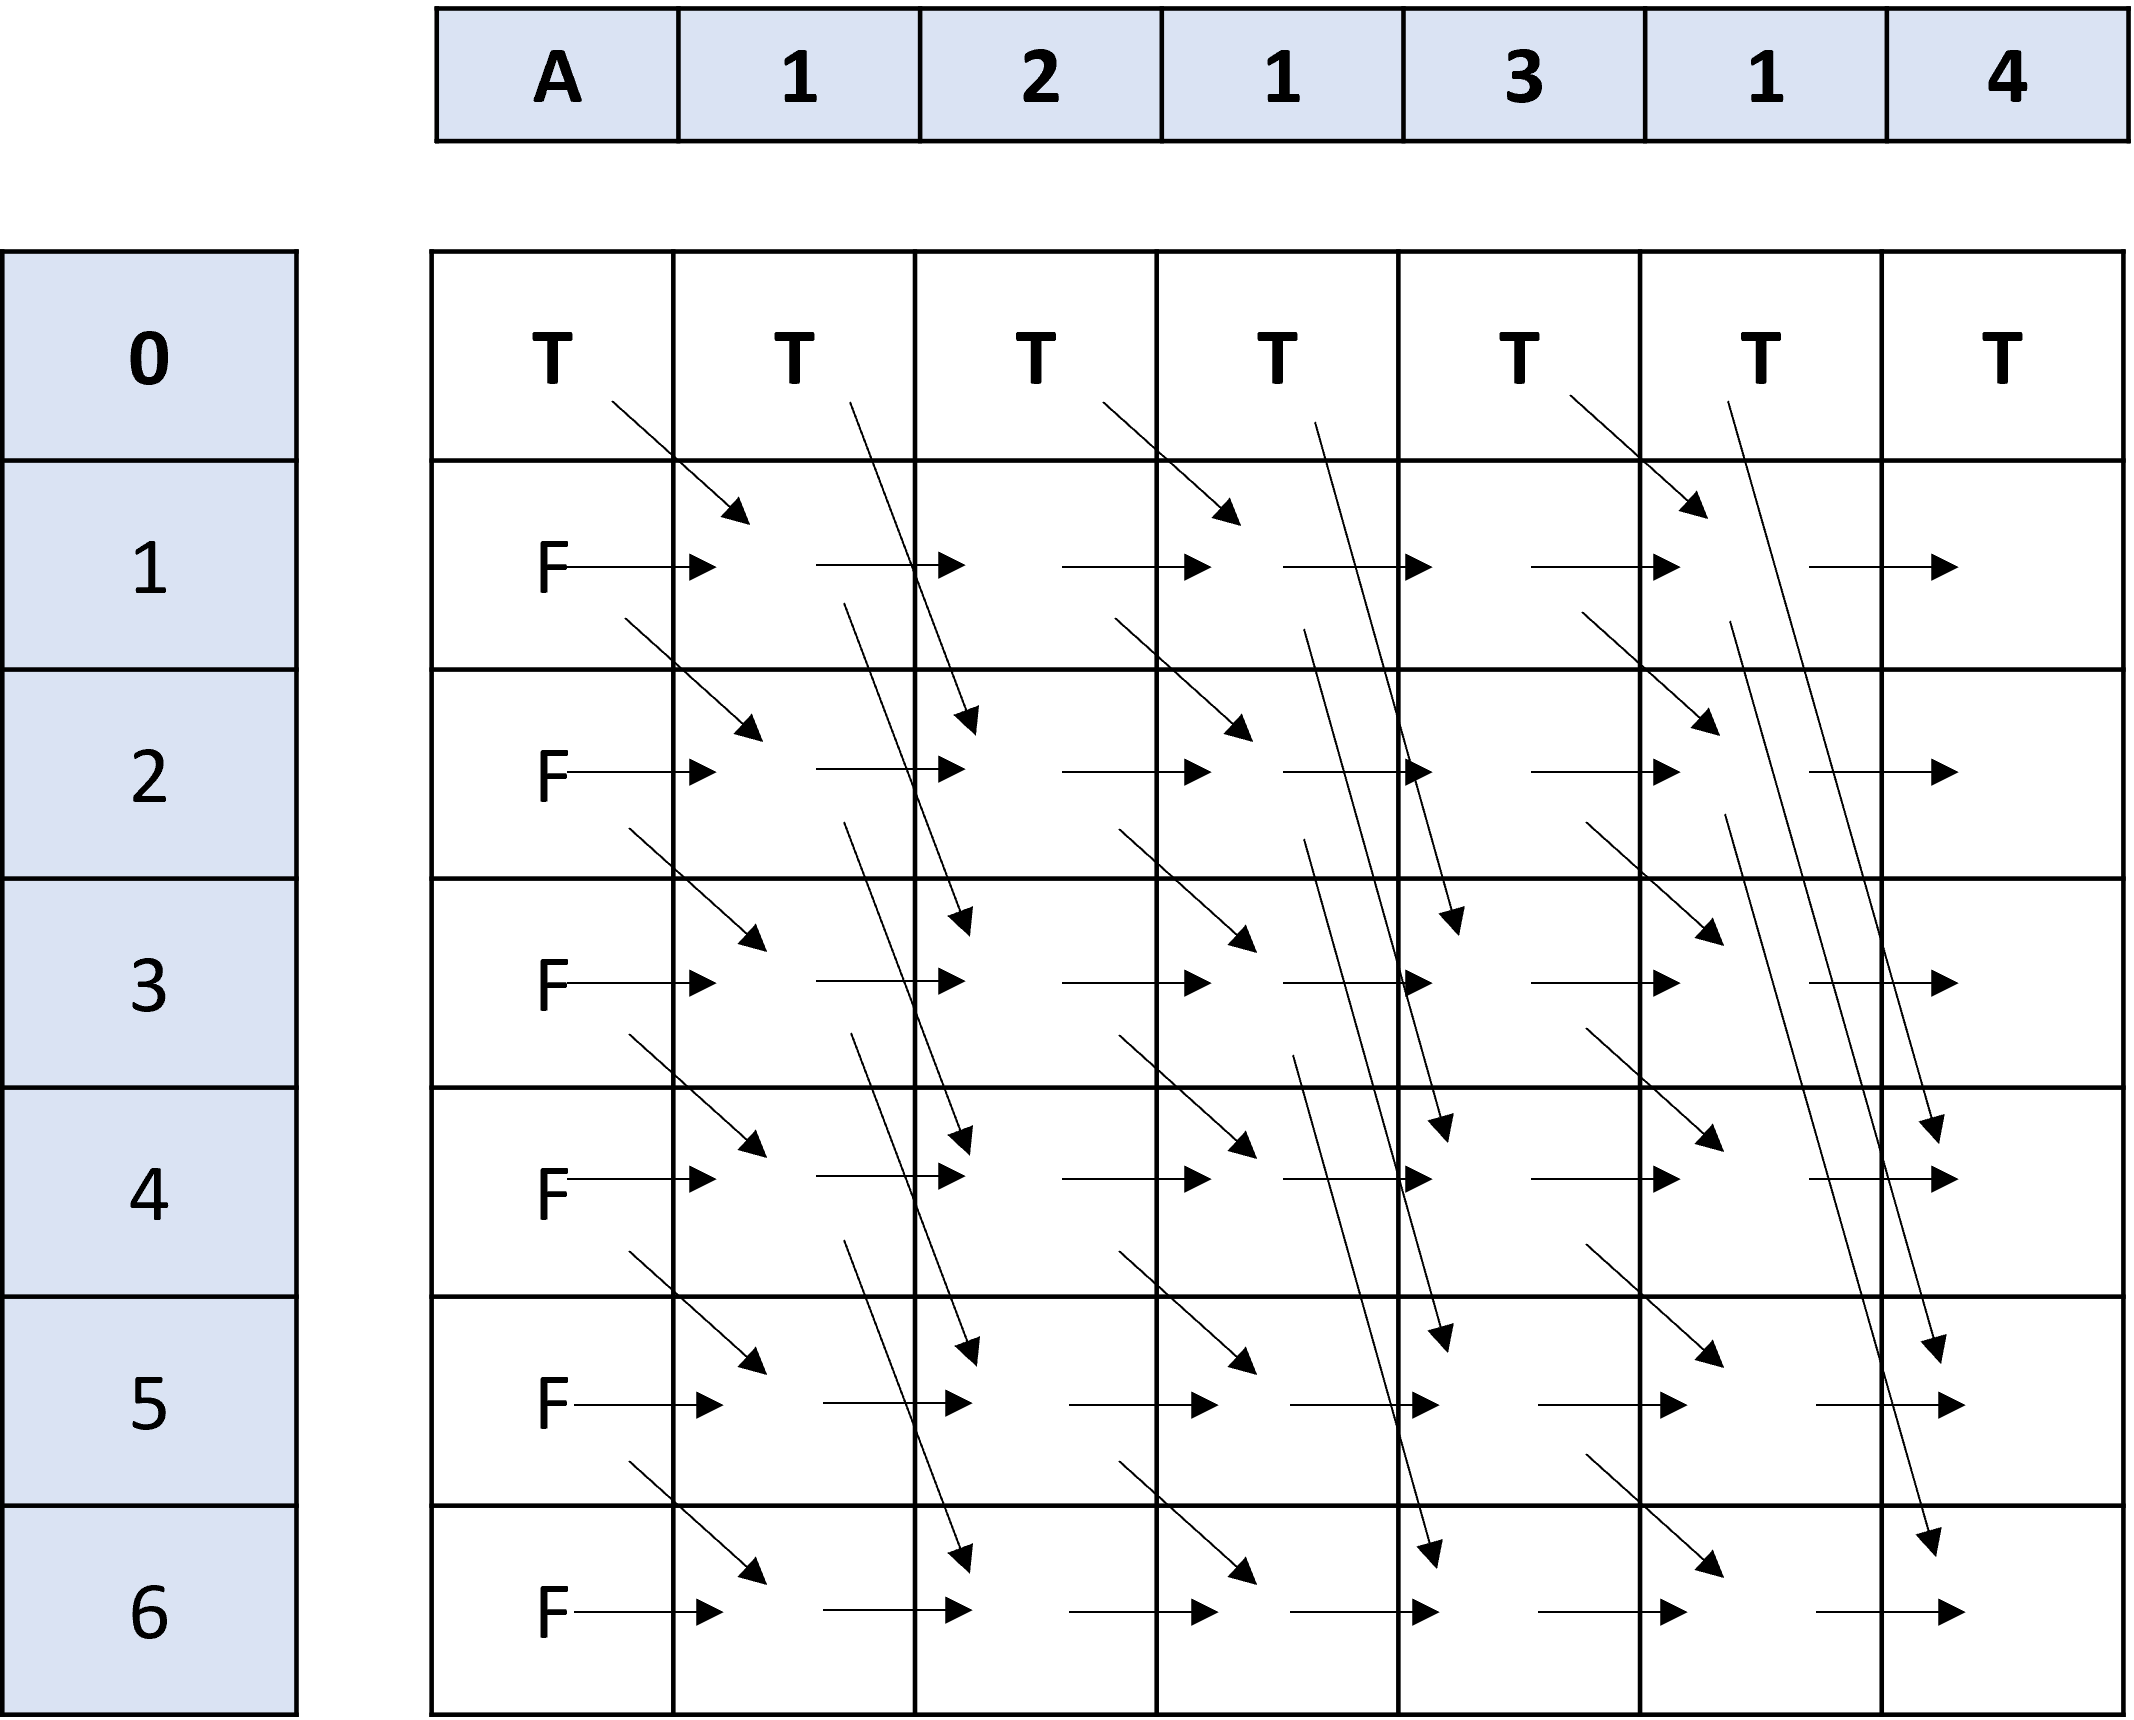

Con el grafo de necesidades, podemos determinar que un recorrido tradicional por la matriz es suficiente para abarcar el problema

##### **Diseño e implementación del algoritmo de Programación Dinamica**

In [11]:
import numpy as np

def DynamicProgrammingSum_Array(P,a):
    #Use dynamic programming to solve the problem
    n = len(a)
    S = np.zeros((P+1, n+1), dtype=bool)
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            if i==0: S[i,j] = True
            if j==0 and i>0: S[i,j] = False
            if j>0 and i>0 and a[j-1]>i: S[i,j] = S[i,j-1]
            if j>0 and i>0 and a[j-1]<=i : S[i,j] = S[i-a[j-1],j-1] or S[i,j-1]
    #Recover the configuration that got the solution
    answer = np.zeros(n, dtype=bool)
    i = P
    j = n
    while i>0:
        if S[i-a[j-1],j-1]:
            answer[j-1] = True
            i-=a[j-1]
        j-=1
    return S[P,n],answer
        
a = np.array([15,26,3,12,12])
P = 30

b, S = DynamicProgrammingSum_Array(P,a)

if b: print(f'A partir de {a} y {P}, sabemos que {P} =', '+'.join([str(num) for num in a[S]]))
else: print(f'A partir de {a}, no hay forma de obtener {P}')


A partir de [15 26  3 12 12] y 30, sabemos que 30 = 15+3+12


#### *Ejercicio 2*

Dada una matriz (no necesariamente cuadrada) de unos y ceros, encontrar la cantidad de filas y columnas de la submatriz cuadrada más grande, tal que todos los elementos de dicha submatriz sean iguales a 1

##### **Formalización**

Para formalizar este problema, debemos entender que nuestro objetivo es determinar si con los elementos del arreglo $a$, se puede conseguir la suma $T$ con un subconjunto de $a$:

* **Entradas y Salidas**: El problema tiene dos entradas y una salida.

<center>

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
|  E  |  $a$   | Array[0,n)[0,m) of **nat** | Valor que se desea alcanzar con la suma de elementos del arreglo |
|  S  |  $s$   | **nat** | Cantidad de filas y columnas de la submatriz cuadrada de unos más grande  |


</center>

* **Precondición**: La matriz de entrada unicamente debe estar compuesta de ceros o unos

$$ \forall_{i,j} \,|\, 0 \leq i < n \wedge 0 \leq j < m : a[i][j] = 0 \vee a[i][j] = 1 $$

* **Postcondición**:

$$s \equiv 
    \begin{array}{}
    ( \exist_s \,|\, 0 \leq s < \min(m,n) : ( \exist_{k,l} \,|\, 0 \leq k < n-s \wedge 0 \leq l < m-s : (\forall_{i,j} \,|\, k \leq i \leq k+s \wedge l \leq j \leq l+s : a[i][j] = 1 ))) \\
    \wedge \\
    ( \forall_p \,|\, s < p < \min(m,n) : ( \forall_{k,l} \,|\, 0 \leq k < n-p \wedge 0 \leq l < m-p : (\exist_{i,j} \,|\, k \leq i \leq k+p \wedge l \leq j \leq l+p : a[i][j] = 0 )))
    
    \end{array}
$$

##### **Función que describe el problema**

Dado el problema descrito, la entrada $m$, definimos la función

$$U: \mathbb{N} \times \mathbb{N} \mapsto \mathbb{N}$$

que recibe como entradas $i$ y $j$, que representan el tamaño de la submatriz de unos más grande de la matriz que incluye las posiciones $m[i][j]$.

##### **Recurrencia que describe la solución**

$$
    U(i,j) = \left\{ 
        \begin{array}{lcccr}
            a[i][j] & & \text{si}  & &  i=0 \vee j=0 \\
            0 & & \text{si}  & &  i>0 \wedge j>0 \wedge a[i][j] = 0 \\
            \min(U(i-1,j),U(i,j-1),U(i-1,j-1)) + 1 & & \text{si}  & &  i>0 \wedge j>0 \wedge a[i][j] = 1 \\
        \end{array}
    \right.
$$


Para el problema en cuestión, la respuesta está descrita por:

$$ s = \max\{U(i,j) \,|\, 0 \leq i < n \, , \, 0 \leq j < m\} $$

##### **Grafo de Necesidades**

##### **Diseño e implementación del algoritmo de Programación Dinamica**

In [9]:
import numpy as np

def DynamicProgrammingOnesSquaredMatrix(a):
    n,m = a.shape
    U = np.zeros(shape = (n,m), dtype = int)
    s = 0
    for i in range(n):
        for j in range(m):
            if i==0 or j==0: U[i,j] = a[i,j]
            if i>0 and j>0 and a[i,j] == 0: U[i,j] = 0
            if i>0 and j>0 and a[i,j] == 1: U[i,j] = min(U[i-1,j-1],U[i-1,j],U[i,j-1])+1
            s = max(s,U[i,j])
    return s

a = np.array([[1,1,0,1,1,0],
              [1,1,1,1,1,1],
              [0,1,0,1,1,1],
              [0,1,0,1,1,1]])

s = DynamicProgrammingOnesSquaredMatrix(a)
print(f'La submatriz cuadrada de unos más grande es de dimensiones {s} x {s}')

La submatriz cuadrada de unos más grande es de dimensiones 3 x 3


#### *Ejercicio 3*

Desarrollar un programa que cuente la cantidad de números de $N$ dígitos en base 4 que no tengan ceros adyacentes. Por ejemplo, para $N=10$ un número válido sería $3011203320$ mientras que uno inválido sería $2113002021$

##### **Formalización**

Para formalizar este problema, debemos entender que nuestro objetivo es determinar la cantidad de números de longitud $N$ que cumplen dicha propiedad:

* **Entradas y Salidas**: El problema tiene una entrada y una salida.

<center>

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
|  E  |  $N$   | **nat** | Cantidad de dígitos de los números en base 4 a analizar |
|  S  |  $r$   | **nat** | Cantidad de números de $N$ dígitos en base 4 que no tienen ceros adyacentes  |


</center>

* **Precondición**: Se debe tener un número $N$ mayor o igual a 0.

$$N \geq 0$$

* **Postcondición**: Dado el conjunto de todos los números en base 4 que no tienen ceros adyacentes de longitud $N$, se tiene que $r$ es el tamaño de este conjunto.

$$S = \{ x \in \mathbb{Z}_4^n \, | \, \forall_{1\leq i < N} \,\, x_i \neq 0 \vee x_{i+1} \neq 0 \} \wedge r = |S|$$

##### **Función que describe el problema**

Dado el problema descrito, la entrada $N$ y que trabajamos con números en base $4$, definimos la función

$$M: \mathbb{N} \times \mathbb{N} \mapsto \mathbb{N}$$

que recibe como entradas $i$ y $j$, que representan la cantidad de números de longitud $j$ en base $4$ que terminan en $j$.

##### **Recurrencia que describe la solución**

$$
    M(i,j) = \left\{ 
        \begin{array}{lcccr}
            0 & & \text{si}  & &  i=0 \\
            1 & & \text{si}  & &  i=1 \\
            M(i-1,1) + M(i-1,2) + M(i-1,3) & & \text{si}  & &  i>1 \wedge j=0 \\
            M(i-1,1) + M(i-1,2) + M(i-1,3) + + M(i-1,0) & & \text{si}  & &  i>1 \wedge j>0 \\
        \end{array}
    \right.
$$


Para el problema en cuestión, la respuesta está descrita por:

$$ r = \sum_{k=0}^{3} M(N,k) $$

##### **Grafo de Necesidades**

##### **Diseño e implementación del algoritmo de Programación Dinamica**

In [12]:
import numpy as np

def DynamicProgramming_CountBaseFour(N):
    M = np.zeros(shape=(N+1,4),dtype=int)
    for i in range(N+1):
        for j in range(4):
            if i==0: M[i,j] = 0
            if i==1: M[i,j] = 1
            if i>1 and j==0: M[i,j] = M[i-1,1] + M[i-1,2] + M[i-1,3]
            if i>1 and j>0: M[i,j] = M[i-1,1] + M[i-1,2] + M[i-1,3] + M[i-1,0]

    return sum(M[N,k] for k in range(4))

N = 10
r = DynamicProgramming_CountBaseFour(N)

print(f'Existen {r} números en base 4 sin ceros adyacentes de longitud {N}')

Existen 641520 números en base 4 sin ceros adyacentes de longitud 10


#### *Ejercicio 4*

En un juego de video el protagonista tiene que atravesar un recorrido lineal de N metros. En cada metro pueden ocurrir una de dos cosas:

1. Hay un trampolín que le permite saltar una cantidad de metros entre 2 y K hacia adelante. El protagonista puede decidir si usa el trampolín para saltar o si simplemente camina un metro hacia adelante.
2. Hay un abismo en el que si cae, pierde el juego.

Se debe desarrollar un programa que determine si existe algúna forma de llegar al final del recorrido. Se debe llegar exactamente al metro N porque después de este metro hay un abismo.


##### **Formalización**

Para formalizar este problema, debemos entender que nuestro objetivo es determinar si existe un camino que nos permita recorrer $N$ metros dado un conjunto posible de acciones descrito por un arreglo $a$:

* **Entradas y salidas**: Para el problema se definen una en

<center>

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
|  E  |  $a$   | Array[0,N+1) of **nat** | Arreglo que representa el alcance de los trampolines o si se encuentra un abismo |
|  S  |  $b$   | **boolean** | Booleano que representa si el recorrido es viable o no|
|  S  |  $S$   | Array[0,N+1) of **boolean** | Arreglo que representa el conjunto de indices del recorrido viable |

</center>

* **Precondición**: Se debe cumplir que el arreglo sea de $N+1$ elementos y que la última posición del arreglo sea cero; y para todas las demás se tiene -1 si existe un abismo o se tiene un natural mayor a cero que representa hasta donde se puede saltar:

$$a[N] = 0 \wedge \left(\forall_i \, | \, 0 \leq i < N : a[i] > 0 \vee a[i] = -1 \right)$$

* **Postcondición**: El problema tiene solución si existe un camino representado por el conjunto $S$ tal que se puede llegar desde la posición inicial hasta la final de tal forma que sea moviendose de a una casilla por turno o saltando la cantidad de casillas definidas por el trampolin en cierta posición.

$$b = \left( \left(\exist_S : 0 \in S \wedge N \in S \right) \wedge \left( \forall_i \, | \, i \in S : i-1 \in S \vee \left( \exist_k \, | \, 0 \leq k< i : i-k \in S \wedge a[i-k] = k\right) \right)  \right)$$

##### **Función que describe el problema**

Dado el problema descrito, la entrada $N$ y el arreglo $a$, definimos la función

$$G: \mathbb{N} \mapsto \mathbb{B}$$

que recibe como entradas la posición $i$ entre $0$ y $N$; y retornando como resultado si es posible alcanzar llegar a la casilla $i$ desde la posición inicial. 

##### **Recurrencia que describe la solución**

$$G(i) = \left \{
        \begin{array}{lcccr}
            \top & & \text{si}  & & i=0 \\
            \bot & & \text{si}  & & i>0 \wedge a[i] = -1 \\
            G(i-1) \vee \left(\exist_k \,|\, {0\leq k < i} : \, a[i-k] = k \wedge G(i-k)\right) & & \text{si} & & a[i] \geq 0 \wedge i>0
        \end{array}
    \right.$$

Para el problema descrito, la solución esta dada por:

$$b = G(N)$$

##### **Grafo de Necesidades**

##### **Diseño e implementación del algoritmo de Programación Dinamica**

In [13]:
import numpy as np

def DynamicProgrammingIsPath(a):
    #Solution is found using DP
    N = len(a)-1
    G = np.zeros(shape = N+1,dtype=bool)
    for i in range(N+1):
        if i==0: G[i] = True
        if i>0 and a[i] == -1: G[i] = False
        if a[i]>=0 and i>0:
            e = False
            for k in range(1,i):
                e = e or (a[i-k]==k and G[i-k])
            G[i] = G[i-1] or e
    #Solution configuration is recovered
    answer = np.zeros(shape = N+1,dtype=bool)
    s = G[N]
    i = 0
    while i<=N and G[N]:
        answer[i] = True
        if G[i+a[i]] and a[i]>0: i+=a[i]
        else: i+=1
    return G[N], answer

#Solvable case
a = np.array([4,5,9,2,-1,-1,3,-1,3,2,2,-1,3,4,2,-1,3,0])
#Not solvable case
#a = np.array([4,3,9,2,-1,-1,3,-1,3,2,2,-1,3,4,2,-1,3,0])
b,S = DynamicProgrammingIsPath(a)

if b: print(f'El camino si tiene solución; y esta representado por pasar por las posiciones: {np.array([i for i in range(len(a))])[S]}')
else: print('El camino no tiene solución')

El camino si tiene solución; y esta representado por pasar por las posiciones: [ 0  1  6  9 10 12 13 17]
